<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

In [2]:
nlp = spacy.load("en_core_web_lg")

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [3]:
from bs4 import BeautifulSoup
import requests
import ftfy

In [5]:
url = 'https://github.com/skredenmathias/DS-Unit-4-Sprint-1-NLP/blob/master/module2-vector-representations/data/job_listings.csv'

df = pd.read_csv('./data/job_listings.csv')

In [6]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [7]:
def clean_description(description):
    soup = BeautifulSoup(description, 'html.parser')
    return soup.get_text().encode('utf-8').decode('unicode-escape')

df['description_clean'] = df['description'].apply(clean_description)
df.head()

,Unnamed: 0,description,title,description_clean
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA â multiple locations\n2+ yea...


In [13]:
# print ... [0][2:-1]
# Check out library: FTFY, method: fix_text()
ftfy.fix_text(df['description_clean'][0])
# df['dates'] = df['full_review_text'].apply(lambda x: x.split()[0])

df['description_clean'] = df['description_clean'].apply(lambda x: ftfy.fix_text(x)) # Does not work

In [15]:
for row in df['description_clean']:
    df['description_clean'][row] = ftfy.fix_text(df['description_clean'][row])

KeyError: 'b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai¨ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"'

In [16]:
df.head()

,Unnamed: 0,description,title,description_clean
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA – multiple locations\n2+ years...


In [21]:
# Grab useful columns
df = df.copy()
df = df.drop(['Unnamed: 0', 'description'], axis=1)

In [22]:
df.head()

,title,description_clean
0,Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,Data Scientist,b'Location: USA – multiple locations\n2+ years...


In [31]:
df.shape

(426, 2)

## 2) Use Spacy to tokenize the listings 

In [23]:
doc = nlp(df['description_clean'])

print([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])

TypeError: Argument 'string' has incorrect type (expected str, got Series)

In [51]:
from spacy.tokenizer import Tokenizer

tokenizer = Tokenizer(nlp.vocab)

In [35]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['description_clean'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [36]:
df.tokens.head()

0    [b"Job, Requirements:, \n, Conceptual, underst...
1    [b'Job, Description, \n\n, As, a, Data, Scient...
2    [b'As, a, Data, Scientist, you, will, be, work...
3    [b'$4,969, -, $6,756, a, monthContractUnder, t...
4    [b'Location:, USA, –, multiple, locations, \n,...
Name: tokens, dtype: object

In [41]:
df['description_clean'][0]

'b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai¨ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"'

In [28]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [32]:
# df['tokenized'] = tokenize(df['description_clean'])

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [44]:
# Apply CountVectorizer to our Data
# Use custom Spacy Vectorizer
# BBC articles in `data` variable

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', max_df=.90)

#Learn our Vocab
vect.fit(df['description_clean']) # What about the tokens?

# Get sparse dtm
dtm = vect.transform(df['description_clean'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [45]:
dtm.head()

,00,000,02115,03,0305,0356,04,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [46]:
doc_len = [len(doc) for doc in df['description_clean']]

C:\Users\mathi\.conda\envs\U4-S1-NLP\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


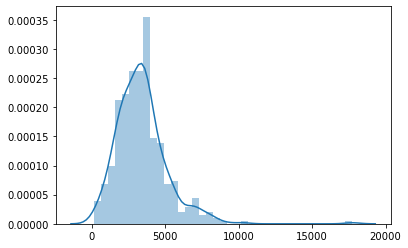

In [48]:
import seaborn as sns
sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english',
                       ngram_range=(1,2),
                       max_df=.97,
                       min_df=3)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(df['description_clean'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,000 employees,000 yearthe,04,10,10 time,10 years,100,100 000,100 companies,...,years requirements,years technical,years work,years working,yearthe,yes,york,york city,york offices,yrs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# def tokenize(document):
    
#     doc = nlp(document)
    
#     return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [ ]:
tokenize

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
dist_matrix  = cosine_similarity(dtm)

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 